In [62]:
import re
import pandas as pd
import jieba
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
# Load JSON data from HW3 into a Python object
with open('exo_discography.json', 'r') as json_file:
    data = json.load(json_file)

In [70]:
# Flatten the list and remove newline characters
flattened_data = ' '.join(data)
flattened_data = flattened_data.replace('\n', ' ')

In [71]:
# Split the flattened text into individual song names using whitespace as the delimiter
song_names = flattened_data.split()

In [72]:
# Join the song names into a single string
flattened_song_names = ' '.join(song_names)

In [73]:
# Tokenize the flattened text using Jieba
tokenized_text = ' '.join(jieba.cut(flattened_song_names))

In [74]:
# Convert tokenized text to DataFrame
df = pd.DataFrame({'text_column': [tokenized_text]})

In [75]:
# Extract features from unstructured data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text_column'])
word_frequencies = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [76]:
# Combine structured and extracted features
features = pd.concat([df, word_frequencies], axis=1)


In [80]:
# Visualize feature relationships
features.head()
'text_column' in features.columns
features['text_column'] = pd.Series(dtype='float64')

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


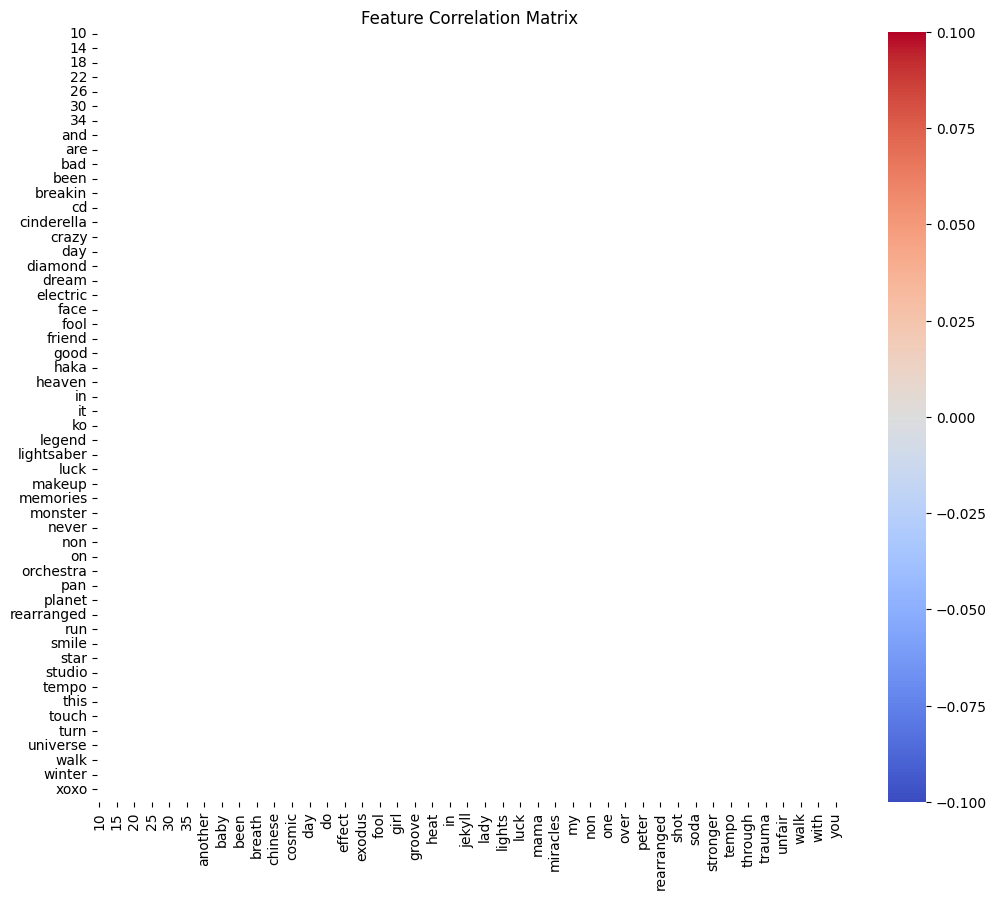

In [81]:
features['text_column'] = pd.to_numeric(features['text_column'], errors='coerce')
correlation_matrix = features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()